# Rafa Analysis

Primary columns:
Country/country rank
Channel type/channel_rank
Category
Created year
Views/video_views_rank
Video view for the last 30 days
Subscribers

In [3]:
# uploading data

data <- read.csv("../youtube_data/Global_YouTube_Statistics.csv")

# Give the code in R-package, for uploading a data set and give the code with the summary statistics, and four visualizations finding relationships, outliers, or interesting trends in the data set.

# write the code

# summary statistics

summary(data)


      rank         Youtuber          subscribers         video.views       
 Min.   :  1.0   Length:995         Min.   : 12300000   Min.   :0.000e+00  
 1st Qu.:249.5   Class :character   1st Qu.: 14500000   1st Qu.:4.288e+09  
 Median :498.0   Mode  :character   Median : 17700000   Median :7.761e+09  
 Mean   :498.0                      Mean   : 22982412   Mean   :1.104e+10  
 3rd Qu.:746.5                      3rd Qu.: 24600000   3rd Qu.:1.355e+10  
 Max.   :995.0                      Max.   :245000000   Max.   :2.280e+11  
                                                                           
   category            Title              uploads           Country         
 Length:995         Length:995         Min.   :     0.0   Length:995        
 Class :character   Class :character   1st Qu.:   194.5   Class :character  
 Mode  :character   Mode  :character   Median :   729.0   Mode  :character  
                                       Mean   :  9187.1                     
       

In [5]:
famous_youtubers <- head(data[order(-data$highest_yearly_earnings), ], 10)


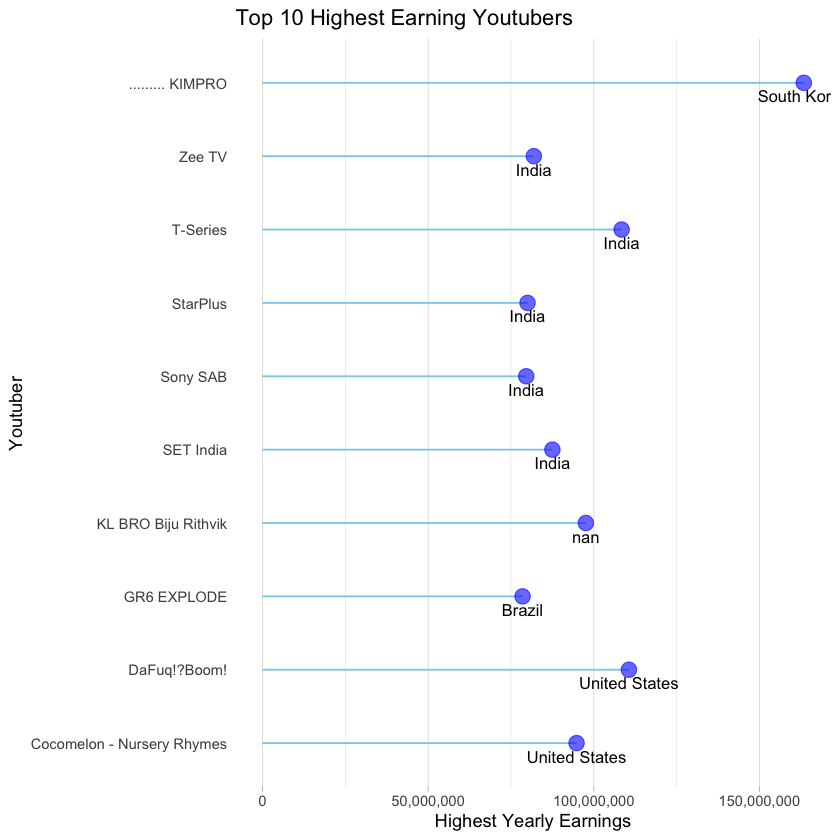

In [10]:
library(ggplot2)
library(scales)

ggplot(famous_youtubers, aes(x = Youtuber, y = highest_yearly_earnings)) +
  geom_segment(aes(x = Youtuber, xend = Youtuber, y = 0, yend = highest_yearly_earnings), color = "skyblue") +
  geom_point(color = "blue", size = 4, alpha = 0.6) +
  geom_text(aes(label = Country), vjust = 1.6, color = "black", size = 3.5) +
  theme_light() +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_y_continuous(labels = comma) +
  labs(title = "Top 10 Highest Earning Youtubers", x = "Youtuber", y = "Highest Yearly Earnings")


In [20]:
unique(data$category)

length(unique(data$category))


[1] "Music"                 "Film & Animation"      "Entertainment"        
 [4] "Education"             "Shows"                 "nan"                  
 [7] "People & Blogs"        "Gaming"                "Sports"               
[10] "Howto & Style"         "News & Politics"       "Comedy"               
[13] "Trailers"              "Nonprofits & Activism" "Science & Technology" 
[16] "Movies"                "Pets & Animals"        "Autos & Vehicles"     
[19] "Travel & Events"

[1] 19

In [24]:
unique(data$channel_type)

length(unique(data$channel_type))


[1] "Music"         "Games"         "Entertainment" "Education"    
 [5] "People"        "Sports"        "Film"          "News"         
 [9] "nan"           "Comedy"        "Howto"         "Nonprofit"    
[13] "Autos"         "Tech"          "Animals"

[1] 15

In [30]:
table(data$category, data$channel_type)


                       
                        Animals Autos Comedy Education Entertainment Film Games
  Autos & Vehicles            0     1      0         0             1    0     0
  Comedy                      0     0     38         0            20    1     3
  Education                   0     0      0        35             3    2     2
  Entertainment               0     1      5         2           169    7    11
  Film & Animation            0     0      1         2            16   17     3
  Gaming                      0     1      1         0            18    2    63
  Howto & Style               0     0      0         0             7    0     0
  Movies                      0     0      0         0             0    2     0
  Music                       0     0      0         1            12    5     2
  News & Politics             0     0      0         0             3    0     0
  Nonprofits & Activism       0     0      0         0             0    0     0
  People & Blogs

In [11]:
options(scipen = 999)

# Create the contingency table
table <- xtabs(video.views ~ category + channel_type, data)


# Format the table with comma-separated thousands
table_formatted <- format(table, big.mark = ",")

# Create a formatted table in markdown format
knitr::kable(table_formatted, format = "markdown")




|                      |Animals        |Autos         |Comedy          |Education       |Entertainment     |Film            |Games           |Howto           |Music             |News            |Nonprofit      |People          |Sports          |Tech           |nan            |
|:---------------------|:--------------|:-------------|:---------------|:---------------|:-----------------|:---------------|:---------------|:---------------|:-----------------|:---------------|:--------------|:---------------|:---------------|:--------------|:--------------|
|Autos & Vehicles      |0              |5,405,563,355 |0               |0               |9,597,894,786     |0               |0               |0               |0                 |0               |0              |0               |0               |0              |0              |
|Comedy                |0              |0             |323,306,249,455 |0               |111,013,015,233   |5,525,773,746   |52,966,747,439  |0               |0    

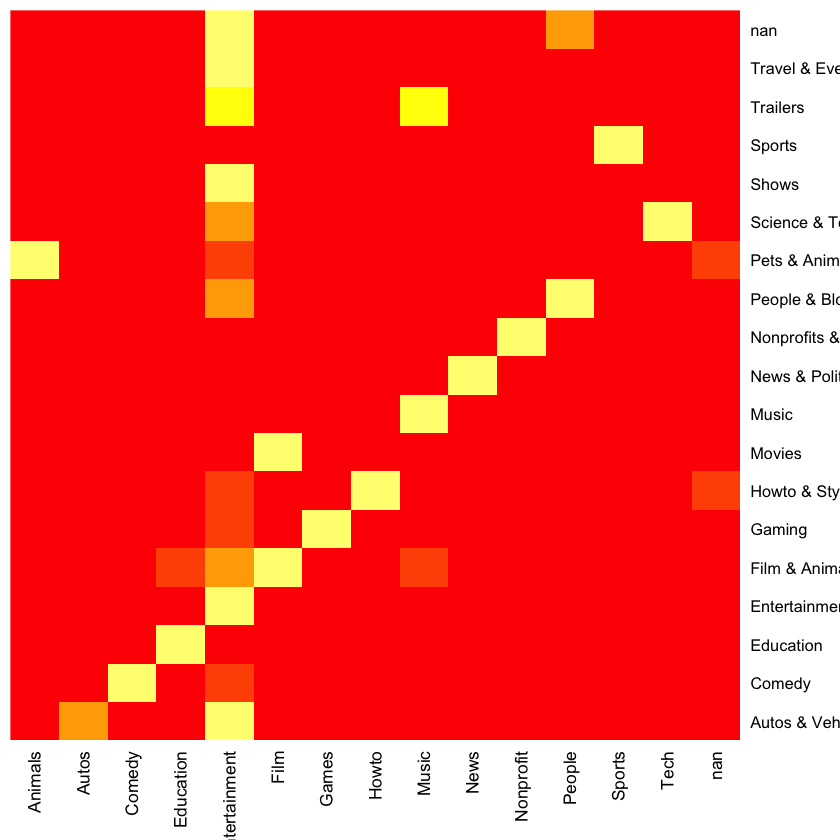

In [36]:
heatmap(table, Rowv = NA, Colv = NA, col = heat.colors(5), margins = c(5, 5))



The downloaded binary packages are in
	/var/folders/qq/17cwmxhd3jv_w07w8pf57y5r0000gn/T//RtmpNT6pYM/downloaded_packages


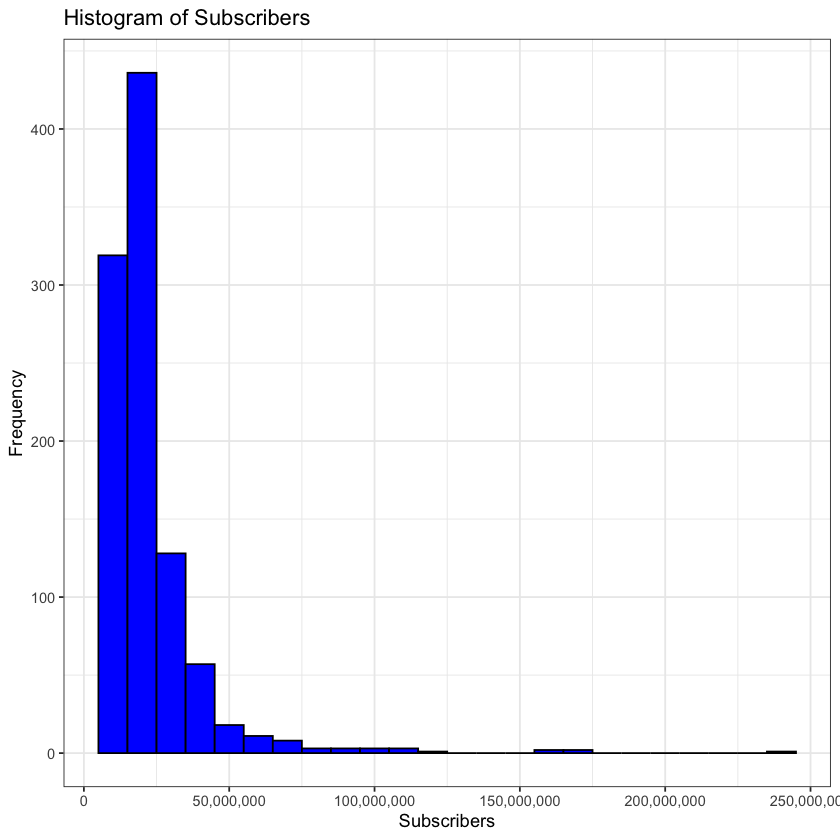

In [11]:
# Plot a histogram of suscribers

library(ggplot2)
# Load the ggplot2 and scales packages
library(scales)

# Create the histogram with comma separator for thousands in x-axis label
ggplot(data, aes(x = subscribers)) +
  geom_histogram(binwidth = 10000000, fill = "blue", color = "black") +
  labs(title = "Histogram of Subscribers", x = "Subscribers", y = "Frequency") +
  scale_x_continuous(labels = comma) +
  theme_bw()


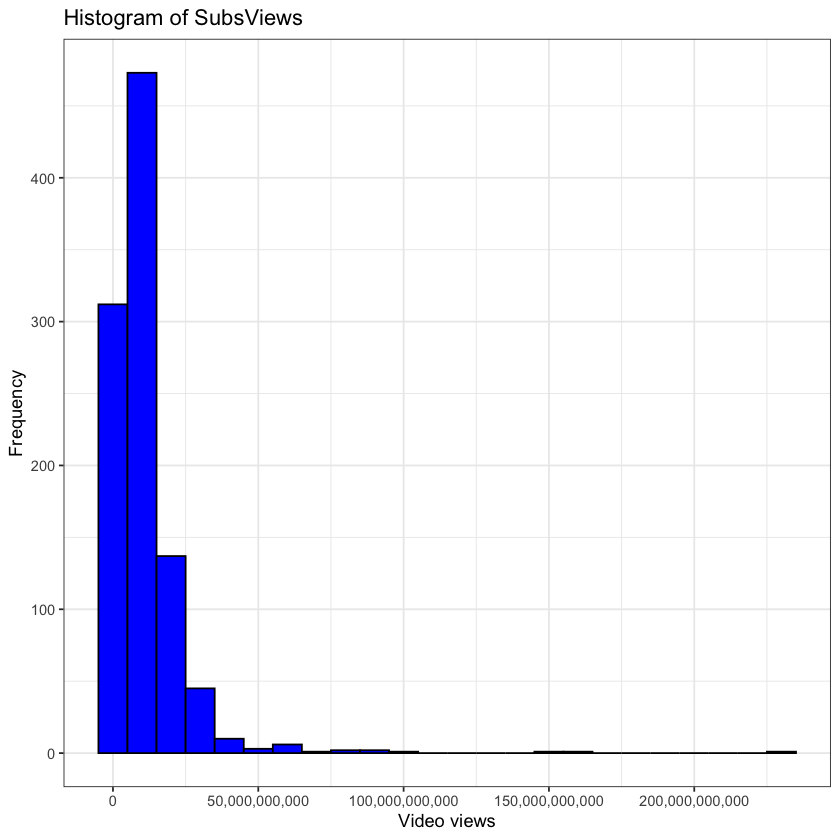

In [12]:
# Create the histogram with comma separator for thousands in x-axis label
ggplot(data, aes(x = video.views)) +
  geom_histogram(binwidth = 10000000000, fill = "blue", color = "black") +
  labs(title = "Histogram of SubsViews", x = "Video views", y = "Frequency") +
  scale_x_continuous(labels = comma) +
  theme_bw()


Warning message:
"Groups with fewer than two data points have been dropped."


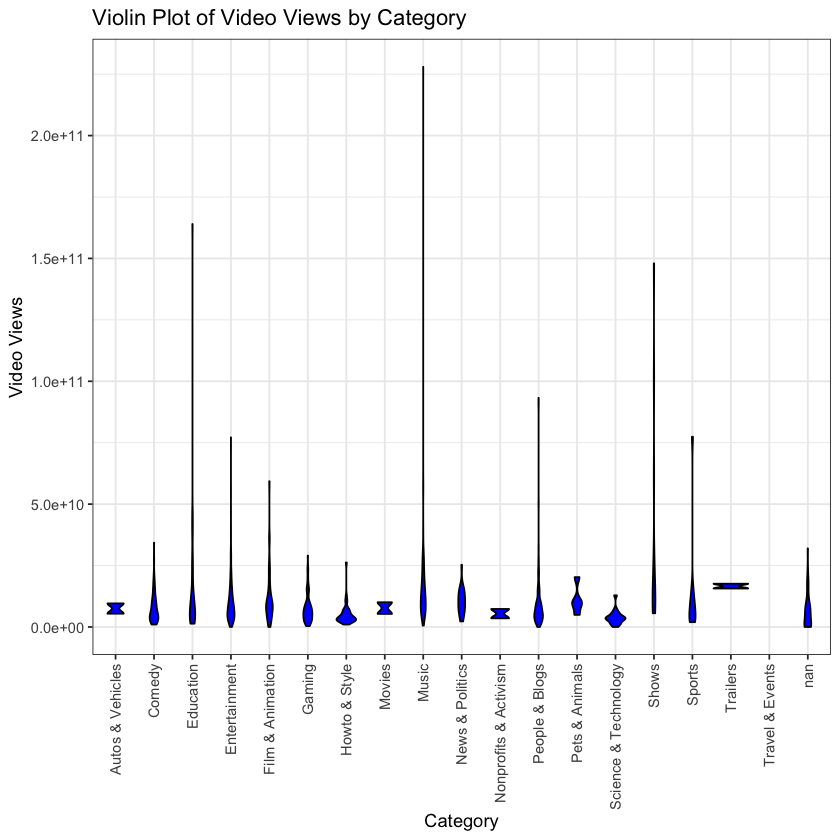

In [17]:
# create a violin plot by category in x axis and video views in y axis, put the names vertically in the x-axis

# Create the violin plot

ggplot(data, aes(x = category, y = video.views)) +
  geom_violin(fill = "blue", color = "black") +
  labs(title = "Violin Plot of Video Views by Category", x = "Category", y = "Video Views") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))


Warning message:
"Groups with fewer than two data points have been dropped."


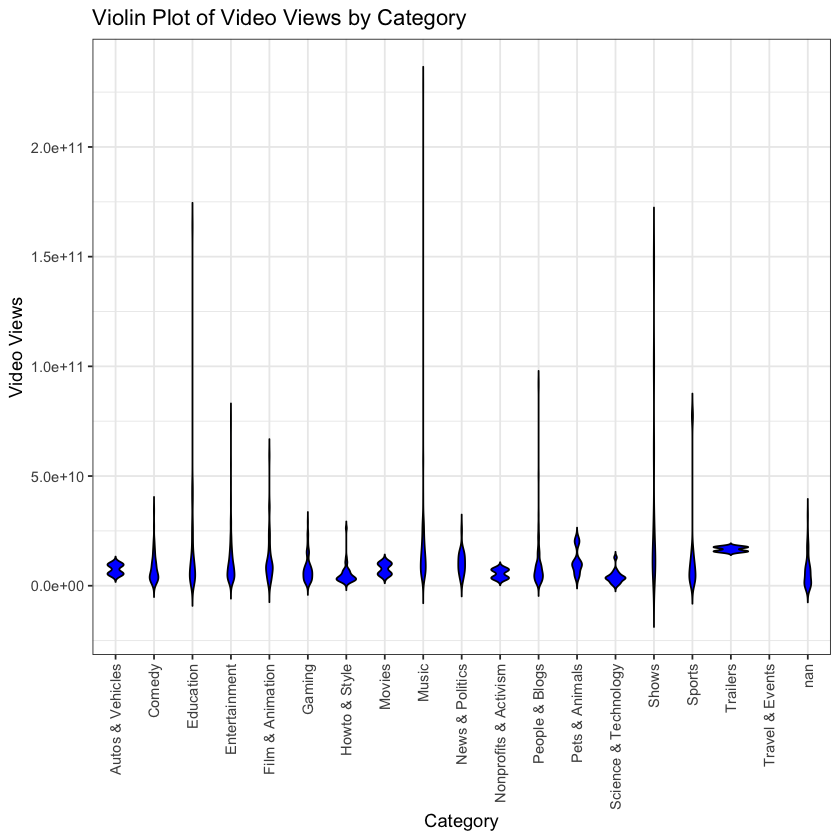

In [18]:
# create a violin plot by category in x axis and video views in y axis, put the names vertically in the x-axis

# Create the violin plot

ggplot(data, aes(x = category, y = )) +
  geom_violin(fill = "blue", color = "black") +
  labs(title = "Violin Plot of Video Views by Category", x = "Category", y = "Video Views") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
